# Excavator use-case 3: task constraints

In [1]:
import processscheduler as ps

problem = ps.SchedulingProblem(name="Excavator3:TaskPrecedenceConstraint")

# three tasks
dig_small_hole = ps.FixedDurationTask(name="DigSmallHole", duration=3)
dig_medium_hole = ps.FixedDurationTask(name="DigMediumHole", duration=7)
dig_huge_hole = ps.FixedDurationTask(name="DigHugeHole", duration=15)

# two workers
small_exc = ps.Worker(name="SmallExcavator")
medium_ex = ps.Worker(name="MediumExcavator")

dig_small_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_medium_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_huge_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)

# adds a precedence constraint: task_2 must be scheduled after task_3

ps.TaskPrecedence(task_before=dig_medium_hole, task_after=dig_huge_hole)

solver = ps.SchedulingSolver(problem=problem)
solution = solver.solve()

Solver type:
	-> Standard SAT/SMT solver
Total computation time:
	Excavator3:TaskPrecedenceConstraint satisfiability checked in 0.01s


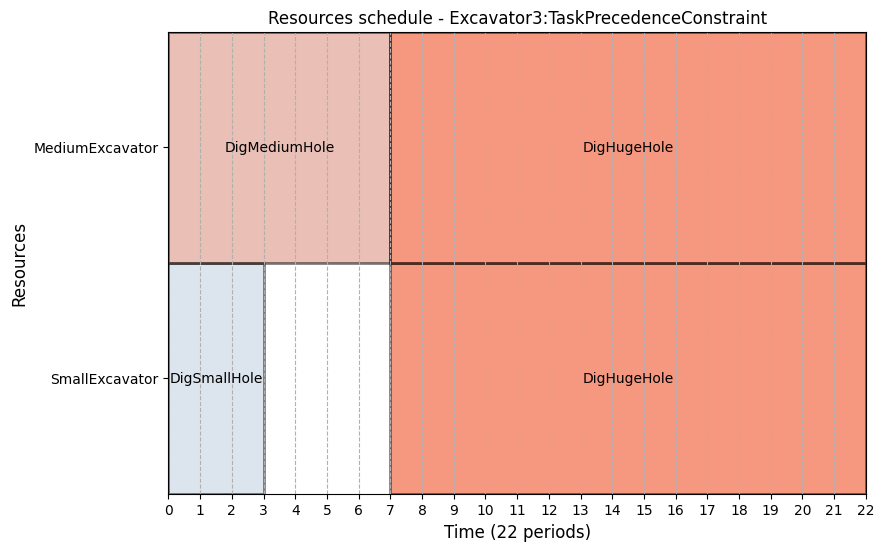

In [2]:
ps.render_gantt_matplotlib(solution)

Solver type:
	-> Standard SAT/SMT solver
Total computation time:
	Excavator3:TaskPrecedenceConstraint satisfiability checked in 0.02s


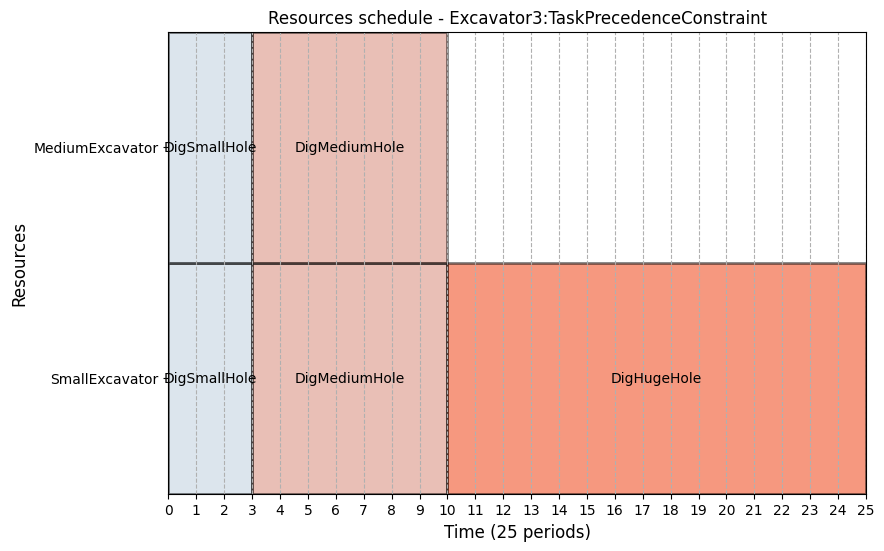

In [3]:
ps.TaskPrecedence(task_before=dig_small_hole, task_after=dig_medium_hole)
solver = ps.SchedulingSolver(problem=problem)
solution2 = solver.solve()
ps.render_gantt_matplotlib(solution2)